# Linear Regression

In this notebook, I have attempted to solve regression problems from scratch.

### Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Simulate Data

In [ ]:
# sample size
n = 1000
# generate random numbers from a normal distribution with a mean of 3 and standard deviation of 5
x = np.random.normal(5, 8, size=n)
# generate linear equation with random noises
y = -20 * x + 30 + np.random.normal(0, 3, size=n)

### Solving Linear Regression

In [ ]:
# calculate sum of x and y
X = np.sum(x)
Y = np.sum(y)
# calculate dot product of x and y
w1 = (n * np.dot(x,y) - X * Y)/(n * np.dot(x,x) - X**2)
w0 = (Y-w1*X)/n
w1, w0 = round(w1, 2), round(w0, 2)
print(f"y = {w1} * x + {w0}")

y = -20.0 * x + 29.95


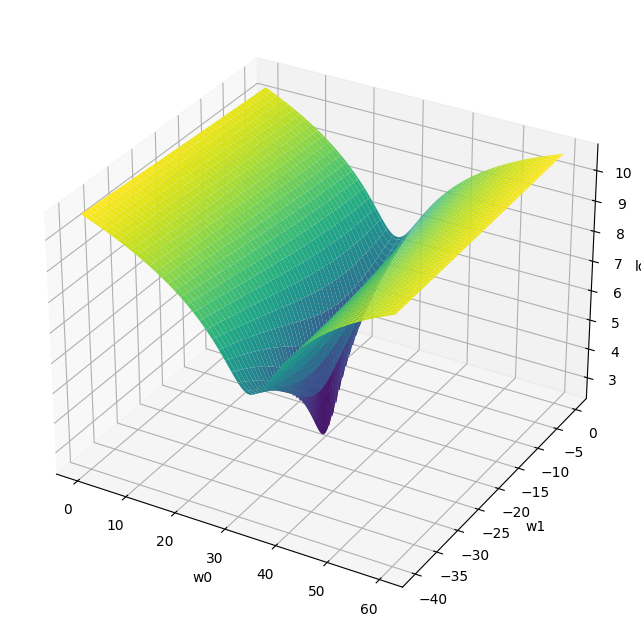

In [ ]:
# define funtion to calculate MSE
def MSE_loss(w0, w1, x, y):
  pred = w0 + w1 * x
  loss = np.sum((pred - y) ** 2) / len(y)
  return loss

# generate a grid around w0, w1
w0_vals = np.linspace(0, 60, 100)
w1_vals = np.linspace(-40, 0, 100)

# calculate MSE for each point of this grid
Z = np.zeros((len(w0_vals), len(w1_vals)))
for i in range(len(w0_vals)):
  for j in range(len(w1_vals)):
    Z[i, j] = np.log(MSE_loss(w0_vals[i], w1_vals[j], x, y))

# 3D plot of MSE loss in log-scale
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, Z, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('loss')
plt.show()

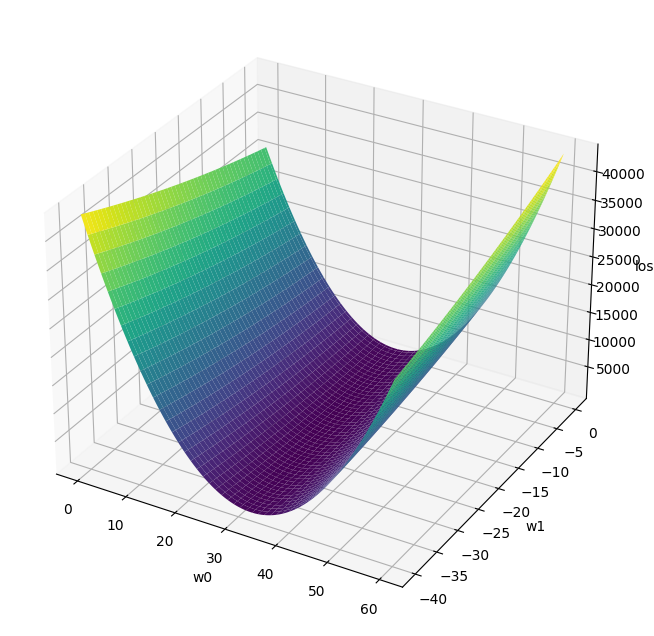

In [ ]:
# define funtion to calculate MSE
def MSE_loss(w0, w1, x, y):
  pred = w0 + w1 * x
  loss = np.sum((pred - y) ** 2) / len(y)
  return loss

# generate a grid around w0, w1
w0_vals = np.linspace(0, 60, 100)
w1_vals = np.linspace(-40, 0, 100)

# calculate MSE for each point of this grid
Z = np.zeros((len(w0_vals), len(w1_vals)))
for i in range(len(w0_vals)):
  for j in range(len(w1_vals)):
    Z[i, j] = MSE_loss(w0_vals[i], w1_vals[j], x, y)

# 3D plot of MSE loss
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, Z, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('loss')
plt.show()

### Gradient Descent

In [ ]:
# define function to calculate the value of a quadratic function for a given input vector w
def J_convex(w):
  return w[0]**2 + 2*w[1]**2

# calculate gradient of a convex function
def grad_J_covex(w):
  return np.array([2 * w[0], 4 * w[1]])

In [ ]:
# perform gradient descent to find minimum of a function
def gradient_descent(grad, w_init, learning_rate=0.1, n_steps=20):
  w = np.array(w_init)
  path = [w.copy()]

  for step in range(n_steps):
    grad_w = grad(w)
    w = w - learning_rate * grad_w
    path.append(w.copy())

  return np.array(path)

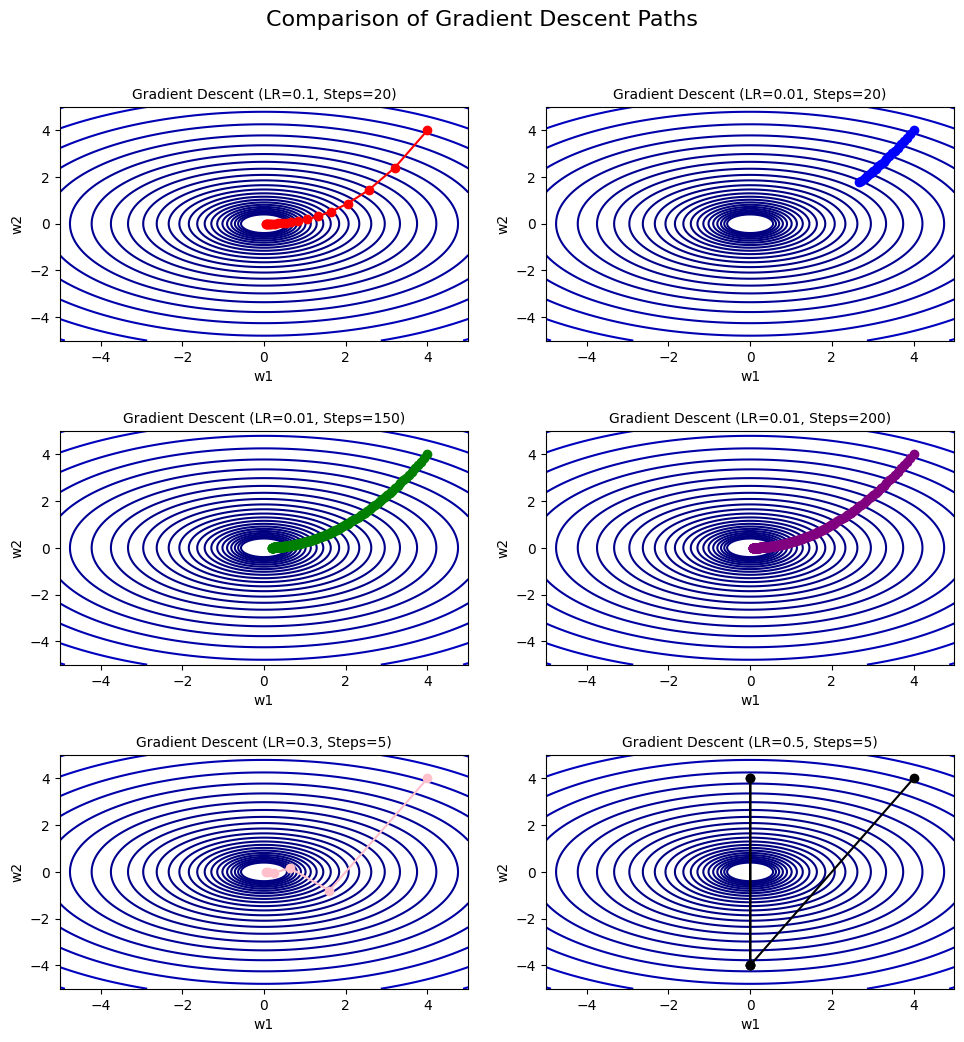

In [ ]:
# initial point
w_init = [4, 4]

# Define gradient descent paths with different learning rates and step counts to illustrate the effect of each parameter
paths = [
    gradient_descent(grad_J_covex, w_init, learning_rate=0.1, n_steps=20),
    gradient_descent(grad_J_covex, w_init, learning_rate=0.01, n_steps=20),
    gradient_descent(grad_J_covex, w_init, learning_rate=0.01, n_steps=150),
    gradient_descent(grad_J_covex, w_init, learning_rate=0.01, n_steps=200),
    gradient_descent(grad_J_covex, w_init, learning_rate=0.3, n_steps=5),
    gradient_descent(grad_J_covex, w_init, learning_rate=0.5, n_steps=5)
]

# visualization

w1_vals = np.linspace(-5, 5, 400)
w2_vals = np.linspace(-5, 5, 400)
W1, W2 = np.meshgrid(w1_vals, w2_vals)

J_vals = J_convex([W1, W2])


fig, axes = plt.subplots(3, 2, figsize=(10, 10))
contour_levels = np.logspace(-0.5, 3, 35)

titles = [
    "Gradient Descent (LR=0.1, Steps=20)",
    "Gradient Descent (LR=0.01, Steps=20)",
    "Gradient Descent (LR=0.01, Steps=150)",
    "Gradient Descent (LR=0.01, Steps=200)",
    "Gradient Descent (LR=0.3, Steps=5)",
    "Gradient Descent (LR=0.5, Steps=5)"
]

# define color for each path
colors = ['red', 'blue', 'green', 'purple', 'pink', 'black']

for idx, ax in enumerate(axes.flat):
  ax.contour(W1, W2, J_vals, levels=contour_levels, cmap="jet")
  path_x, path_y = paths[idx][:, 0], paths[idx][:, 1]
  ax.plot(path_x, path_y, marker="o", color=colors[idx], label=f"Path {idx+1}")
  ax.set_title(titles[idx], fontsize=10)
  ax.set_xlabel("w1")
  ax.set_ylabel("w2")


plt.tight_layout(pad=2)
fig.suptitle("Comparison of Gradient Descent Paths", fontsize=16, y=1.05)
plt.show()